In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 

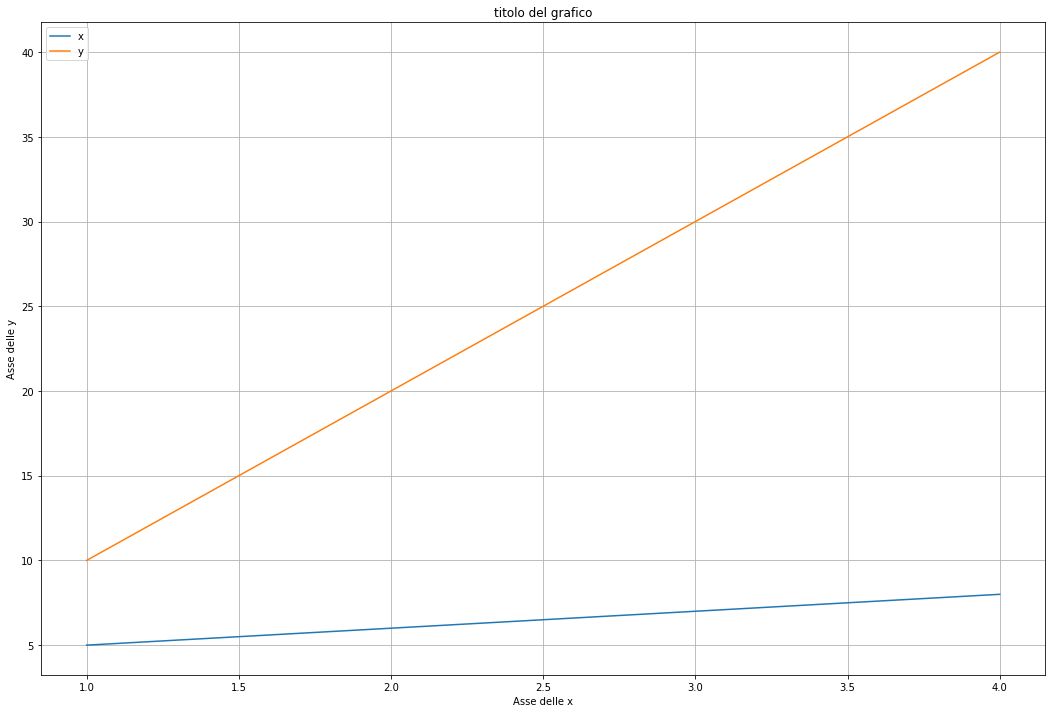

In [2]:

plt.figure(figsize=(18,12))

#x=np.array([1,2,3,4])
#y=np.array([5,6,7,8])
#z=np.array([10,20,30,40])

x=[1,2,3,4]
y=[5,6,7,8]
z=[10,20,30,40]

plt.plot(x,y)
plt.plot(x,z)

plt.title("titolo del grafico")
plt.xlabel("Asse delle x")
plt.ylabel("Asse delle y")
plt.legend(["x","y"])

plt.grid()
plt.show()

In [3]:
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")  #messaggi di allertra che possiamo rimuovere 

df= pd.read_csv("../data/dataWEB/NGINX_data_chart.csv")

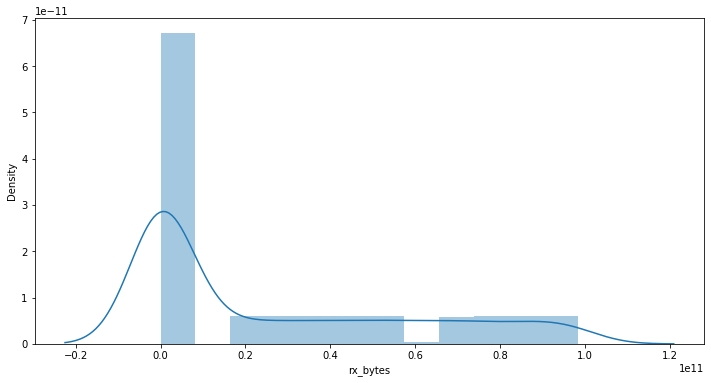

In [6]:

plt.figure(figsize=(12,6))
sns.distplot(df["rx_bytes"],hist=True)  #hist = true mi consente id avere un istogramma in sottofondo 
#plt.xticks(np.linspace(0,1,10)) per avere piu dettagli 
plt.show()


In [ ]:
plt.figure(figsize=(25,25))
sns.barplot(x="cpu_bw", y="requests_per_second",data=df)
plt.yticks(np.linspace(0,4000,50))
plt.show()

In [8]:
#voglio spliattare i dati selezionare solo righe con di size 0 quindi solo righe small ok.. 
small = df.loc[df['size'] == 0]
small

,size,cpu_bw,mem,requests_per_second,completed_requests,failed_requests,html_transfer_byte,mean_time_per_request,total_transfer_byte,transfer_rate_kbyte_per_second,rx_bytes,rx_packets,tx_bytes,tx_packets,vnf
0,0,0.1,64,0.00,0.0,0.0,0.0,0.000,0.0,0.00,40643684.0,113005.0,19184806.0,112879.0,nginx
1,0,0.1,64,1783.06,107128.0,0.0,0.0,0.561,32734529.0,532.07,40102485.0,111501.0,18929278.0,111377.0,nginx
2,0,0.1,64,0.00,0.0,0.0,0.0,0.000,0.0,0.00,38883453.0,108114.0,18354072.0,107992.0,nginx
3,0,0.1,64,1784.42,107065.0,0.0,0.0,0.560,32715251.0,532.47,40079181.0,111440.0,18918184.0,111312.0,nginx
4,0,0.1,64,1755.71,105343.0,0.0,0.0,0.570,32189066.0,523.91,39434018.0,109644.0,18614022.0,109525.0,nginx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,0,1.0,512,7564.65,453880.0,0.0,0.0,0.132,138689589.0,2257.31,169869363.0,471870.0,80197902.0,471861.0,nginx
1576,0,1.0,512,7708.37,462502.0,0.0,0.0,0.130,141324137.0,2300.20,173096355.0,480836.0,81721786.0,480831.0,nginx
1577,0,1.0,512,7828.55,469713.0,0.0,0.0,0.128,143527579.0,2336.06,175794903.0,488329.0,82995416.0,488320.0,nginx
1578,0,1.0,512,7707.84,462471.0,0.0,0.0,0.130,141314693.0,2300.04,173084988.0,480807.0,81715724.0,480790.0,nginx


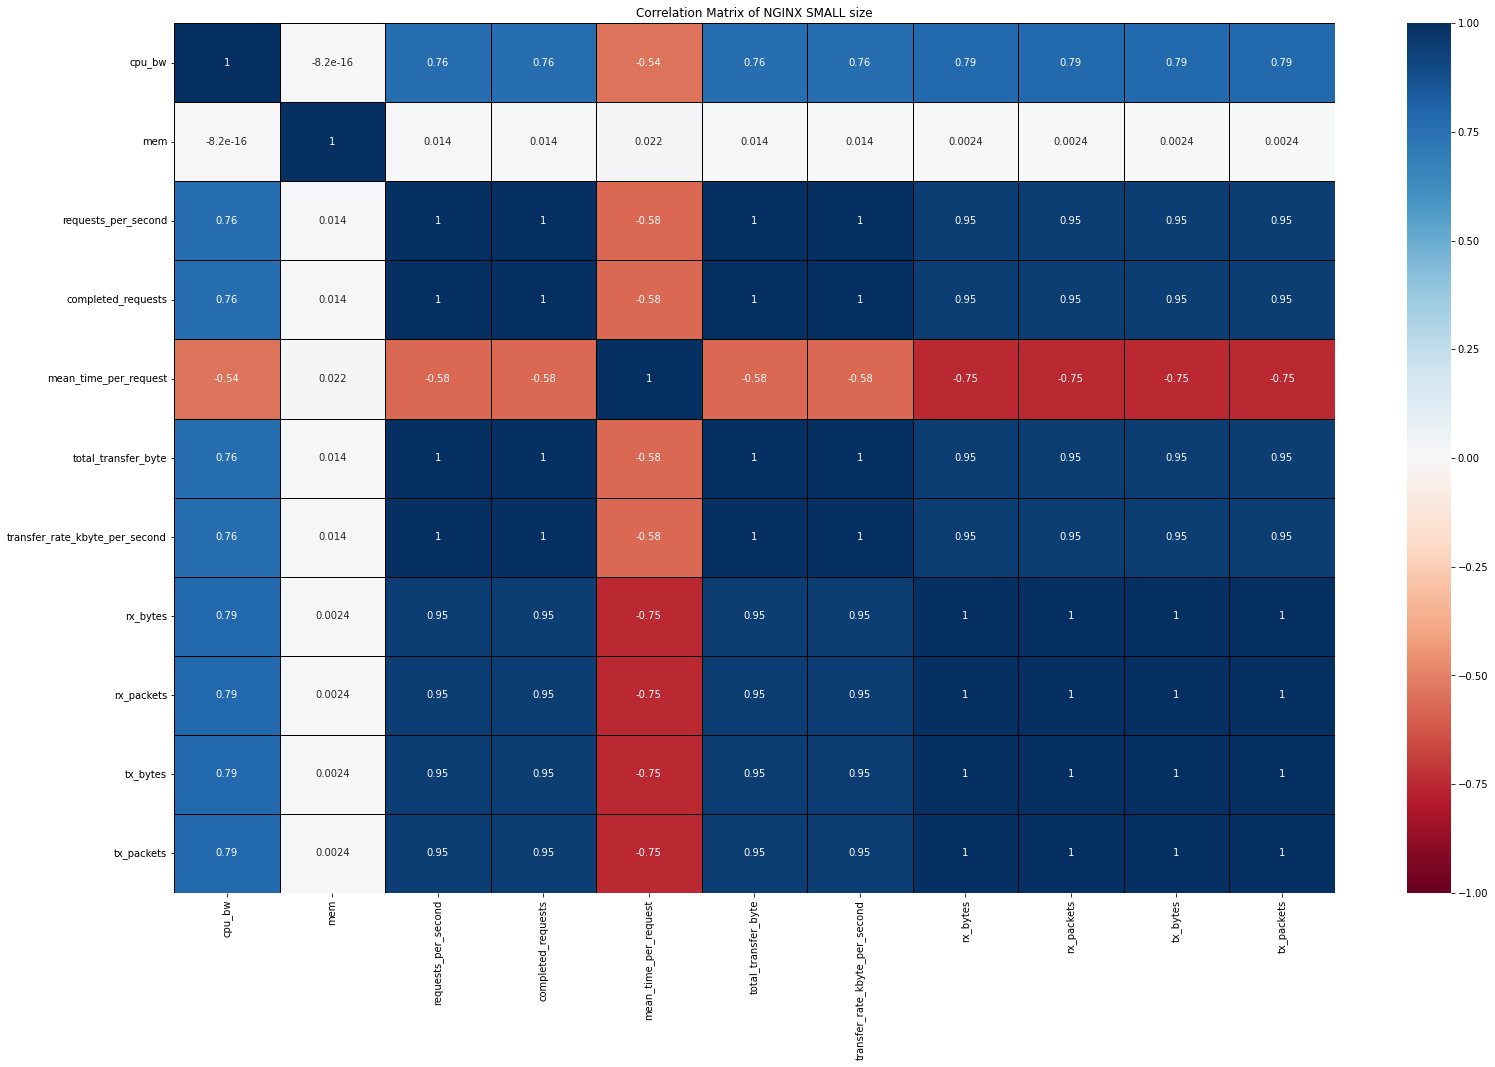

In [60]:
#CORRELATION MATRIX NGINX SMALL
  
smallNGINX = small.drop(['vnf','size','failed_requests','html_transfer_byte'],axis=1)  #droppo failed requests e html trans byte perche ha solo valori nulli 
plt.figure(figsize=(26, 16))
corrMatrix = smallNGINX.corr()  #creazione della matrice di correlazione 
sn.heatmap(corrMatrix, annot=True, cmap="RdBu", linewidths=True, linecolor='black',vmin=-1, vmax=1, robust=True)
plt.title("Correlation Matrix of NGINX SMALL size")
plt.show()


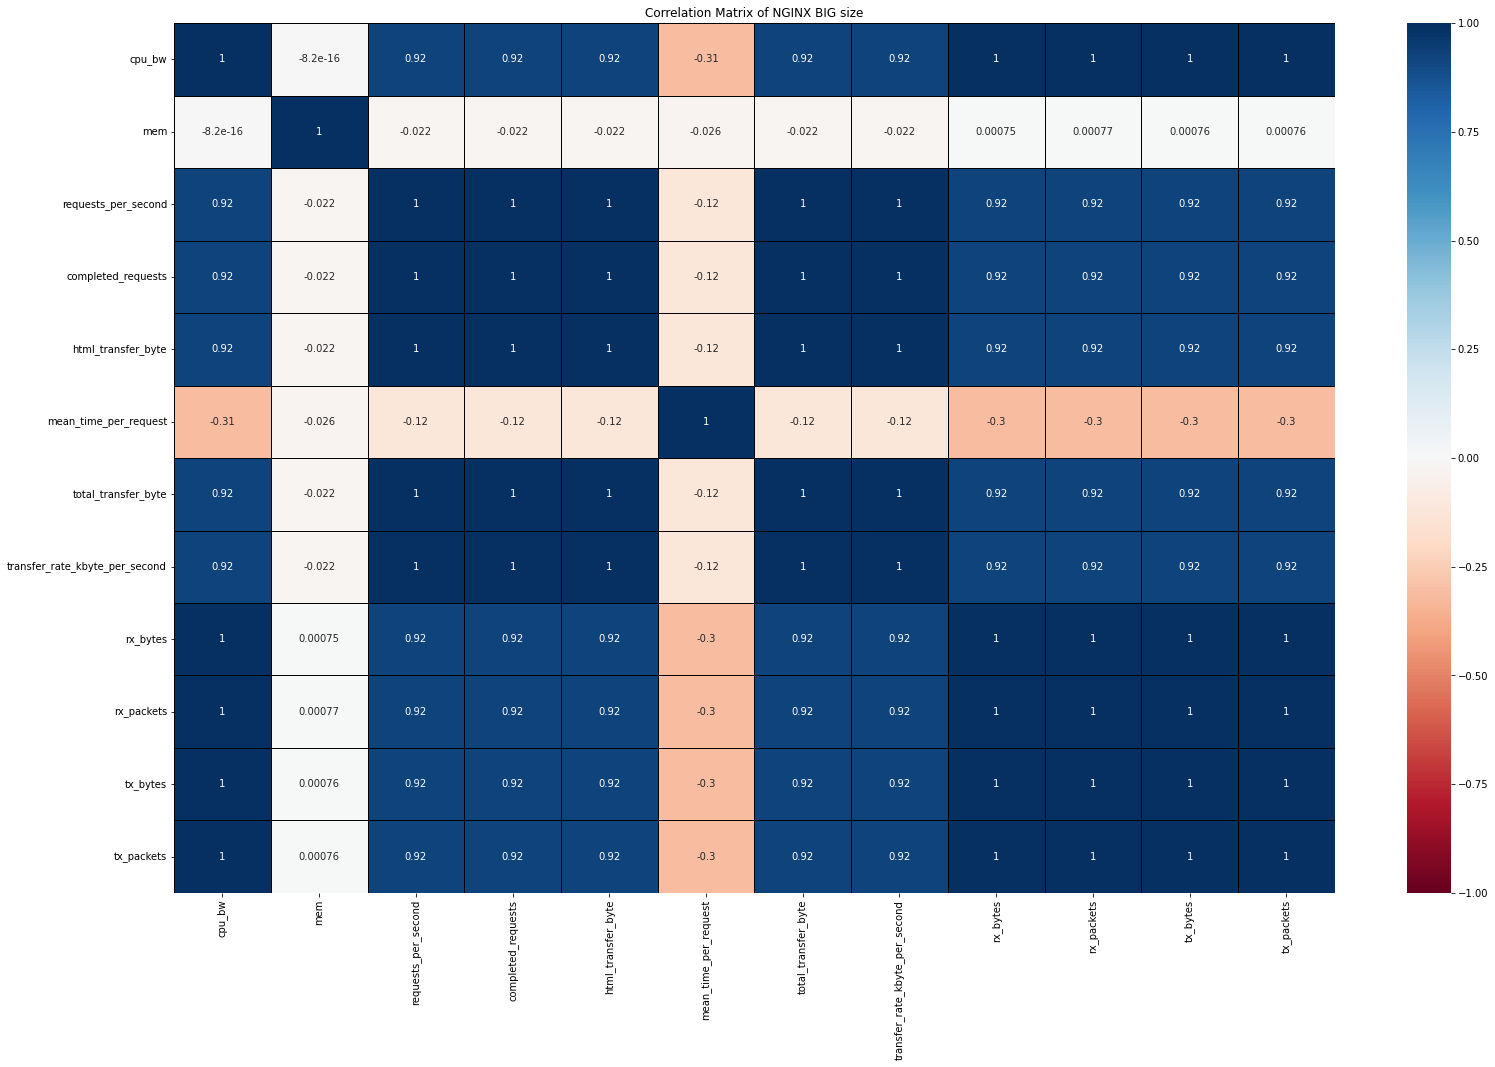

In [62]:
#voglio splittare i dati selezionare solo righe con di size 1 quindi solo righe big ok.. 
big = df.loc[df['size'] == 1]

#CORRELATION MATRIX NGINX BIG
  
bigNGINX = big.drop(['vnf','size','failed_requests'],axis=1)  #droppo failed requests perche ha solo valori nulli 
plt.figure(figsize=(26, 16))
corrMatrix = bigNGINX.corr()  #creazione della matrice di correlazione 
sn.heatmap(corrMatrix, annot=True, cmap="RdBu", linewidths=True, linecolor='black',vmin=-1, vmax=1, robust=True)
plt.title("Correlation Matrix of NGINX BIG size")
plt.show()

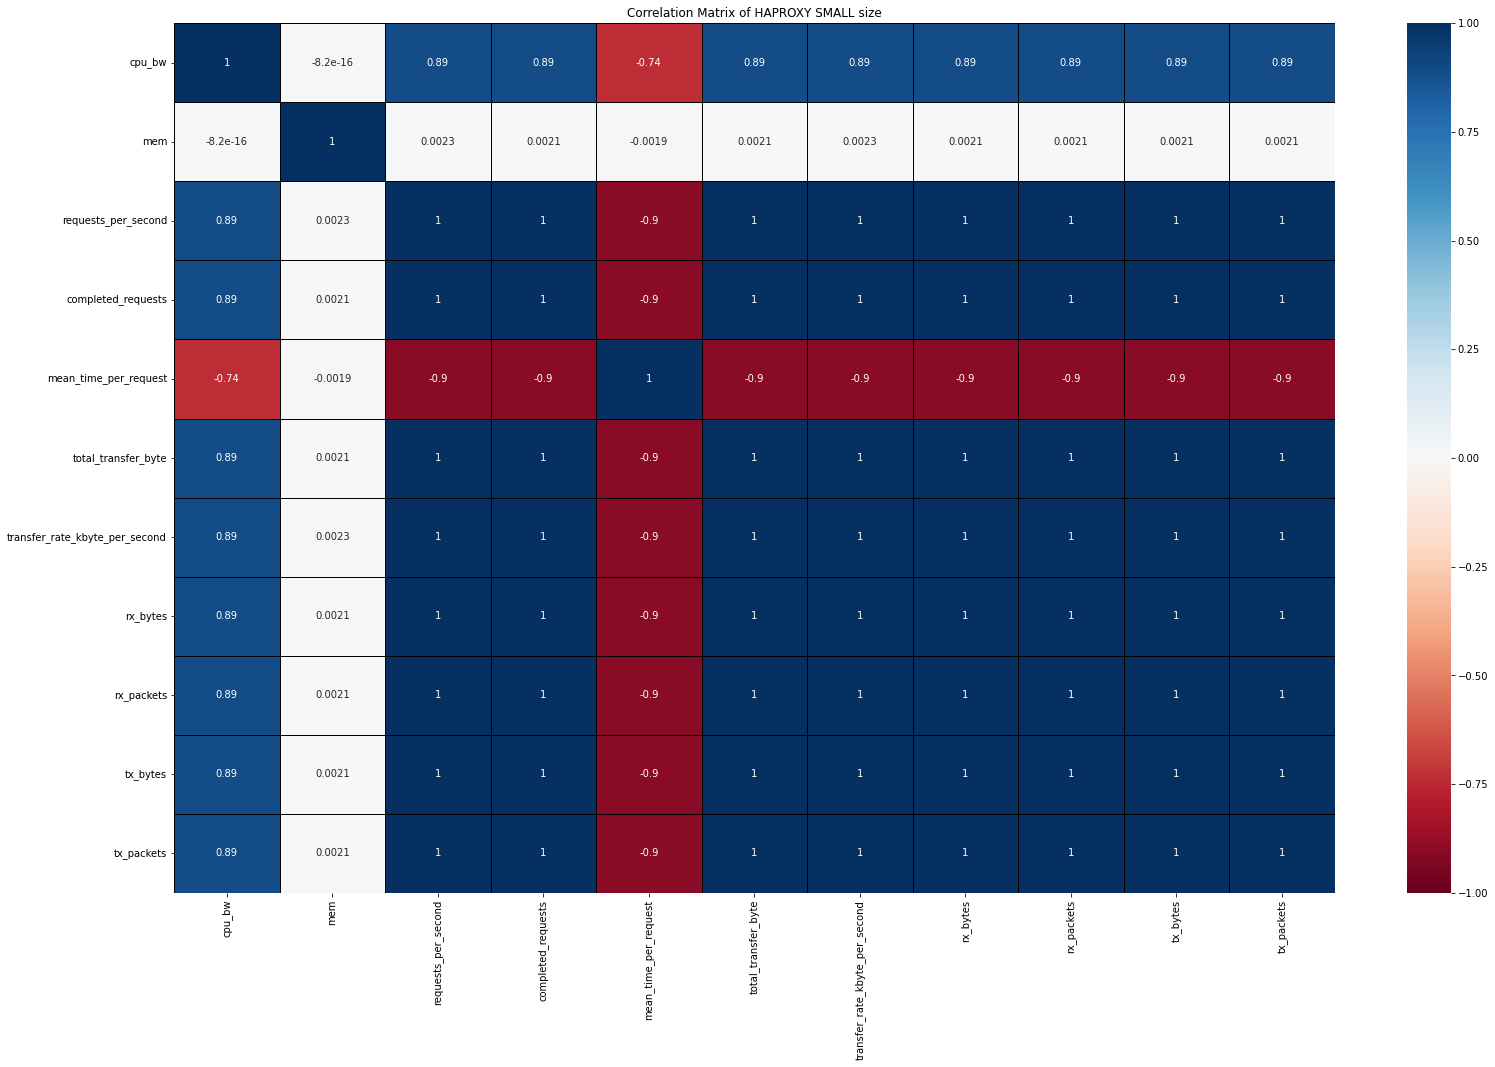

In [67]:
dfH= pd.read_csv("../data/dataWEB/HAPROXY_data_chart.csv")

small = dfH.loc[dfH['size'] == 0]

smallHAPROXY = small.drop(['vnf','size','failed_requests','html_transfer_byte'],axis=1)  #droppo failed requests e html trans byte perche ha solo valori nulli 
plt.figure(figsize=(26, 16))
corrMatrix = smallHAPROXY.corr()  #creazione della matrice di correlazione 
sn.heatmap(corrMatrix, annot=True, cmap="RdBu", linewidths=True, linecolor='black',vmin=-1, vmax=1, robust=True)
plt.title("Correlation Matrix of HAPROXY SMALL size")
plt.show()


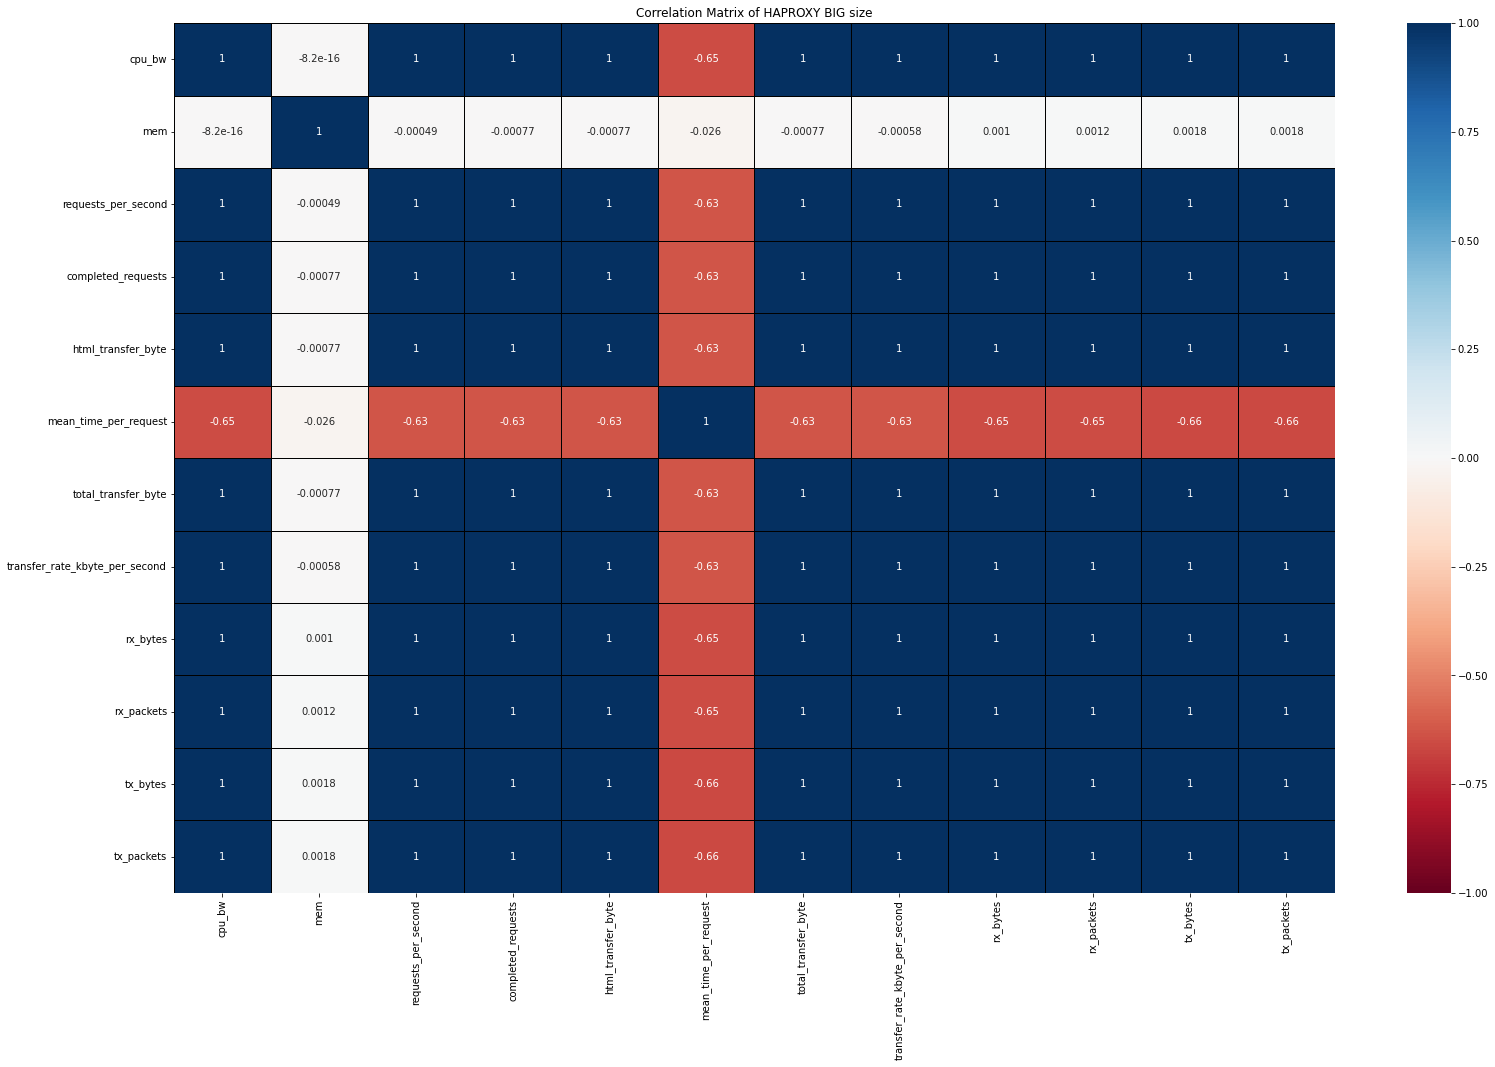

In [75]:
#voglio splittare i dati selezionare solo righe con di size 1 quindi solo righe big ok.. 
big = dfH.loc[dfH['size'] == 1]

#CORRELATION MATRIX HAPROXY BIG
  
bigHAPROXY = big.drop(['vnf','size','failed_requests'],axis=1)  #droppo failed requests perche ha solo valori nulli 
plt.figure(figsize=(26, 16))
corrMatrix = bigHAPROXY.corr()  #creazione della matrice di correlazione 
sn.heatmap(corrMatrix, annot=True, cmap="RdBu", linewidths=True, linecolor='black',vmin=-1, vmax=1, robust=True)
plt.title("Correlation Matrix of HAPROXY BIG size")
plt.show()

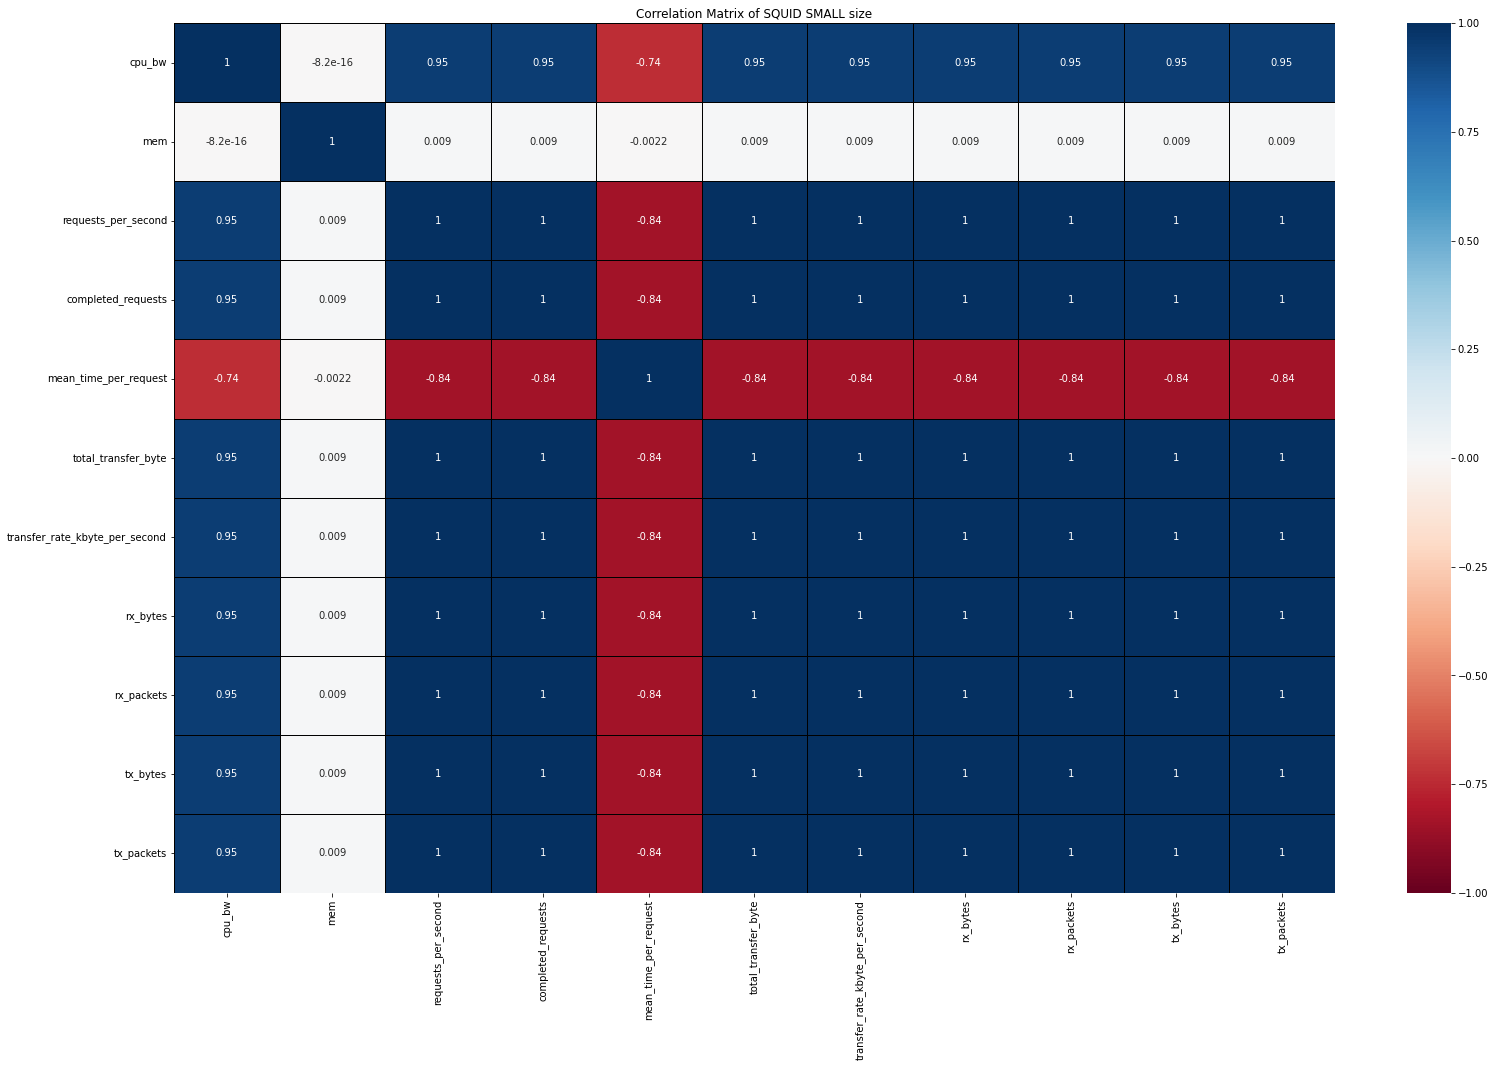

In [73]:
dfS= pd.read_csv("../data/dataWEB/SQUID_data_chart.csv")

small = dfS.loc[dfS['size'] == 0]

smallSQUID = small.drop(['vnf','size','failed_requests','html_transfer_byte'],axis=1)  #droppo failed requests e html trans byte perche ha solo valori nulli 
plt.figure(figsize=(26, 16))
corrMatrix = smallSQUID.corr()  #creazione della matrice di correlazione 
sn.heatmap(corrMatrix, annot=True, cmap="RdBu", linewidths=True, linecolor='black',vmin=-1, vmax=1, robust=True)
plt.title("Correlation Matrix of SQUID SMALL size")
plt.show()

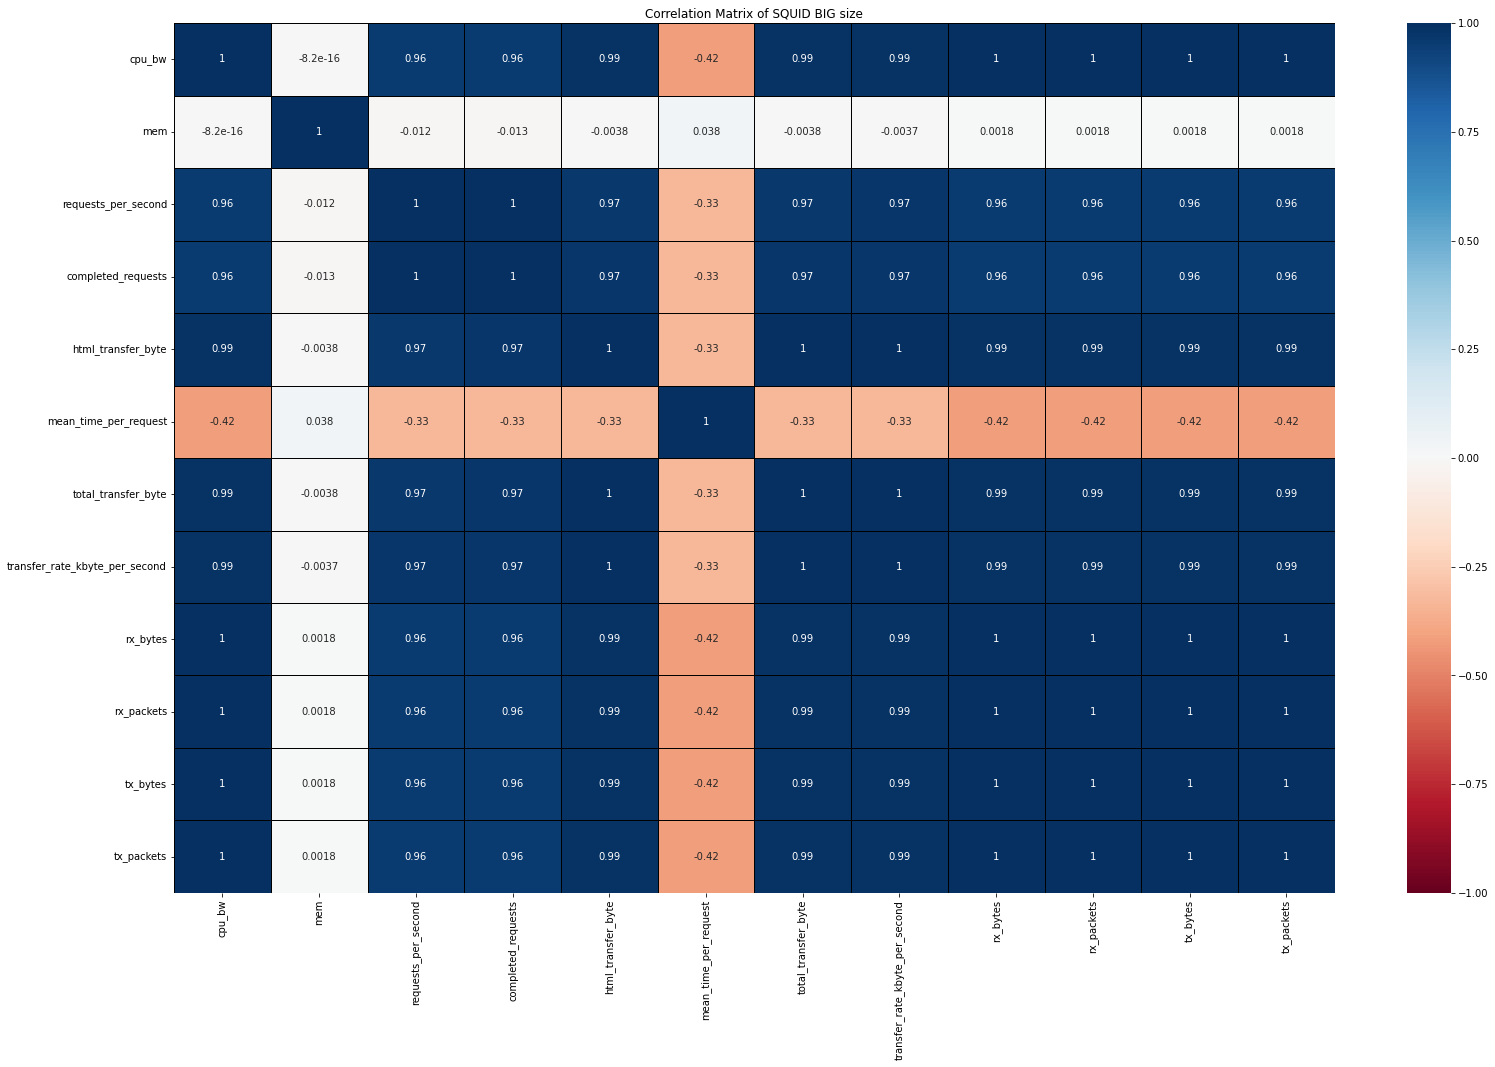

In [74]:
#voglio splittare i dati selezionare solo righe con di size 1 quindi solo righe big ok.. 
big = dfS.loc[dfS['size'] == 1]

#CORRELATION MATRIX SQUID BIG
  
bigSQUID = big.drop(['vnf','size','failed_requests'],axis=1)  #droppo failed requests perche ha solo valori nulli 
plt.figure(figsize=(26, 16))
corrMatrix = bigSQUID.corr()  #creazione della matrice di correlazione 
sn.heatmap(corrMatrix, annot=True, cmap="RdBu", linewidths=True, linecolor='black',vmin=-1, vmax=1, robust=True)
plt.title("Correlation Matrix of SQUID BIG size")
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))
ax= sns.scatterplot(x="cpu_bw", y="requests_per_second", data=small)

In [ ]:
(small["transfer_rate_kbyte_per_second"]==0.00).sum()

In [ ]:
#inizio a generare grafici con i dati combinati

dfC= pd.read_csv("../data/dataWEB/COMBINED_data_chart.csv")
dfC

In [ ]:
smallC = dfC.loc[dfC['size'] == 0]
smallC

In [ ]:
dff = smallC.copy()
plt.figure(figsize=(16,7))
sns.set(font_scale=2, style="ticks")

for i, m in enumerate(["requests_per_second", "completed_requests", "failed_requests", "html_transfer_byte", "mean_time_per_request", "total_transfer_byte", "transfer_rate_kbyte_per_second"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="vnf", col="mem", row="size", data=dff, height=3*3, aspect=1.4, markers=["o","x","s"], legend_out=False, order=1)
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    g.set(xlim=(0.0, 1.1))

In [ ]:
bigC = dfC.loc[dfC['size'] == 1]
bigC

In [ ]:
dff2 = bigC.copy()
plt.figure(figsize=(16,7))
sns.set(font_scale=2, style="ticks")

for i, m in enumerate(["requests_per_second", "completed_requests", "failed_requests", "html_transfer_byte", "mean_time_per_request", "total_transfer_byte", "transfer_rate_kbyte_per_second"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="vnf", col="mem", row="size", data=dff2, height=3*3, aspect=1.4, markers=["o","x","s"], legend_out=False, order=1)
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    g.set(xlim=(0.0, 1.1))

# MALARIAAAA  MQTT MOSQUITTO - START 

In [261]:
dfm= pd.read_csv("../data/dataIoT/MOSQUITTO_data_chart.csv")
dfm

,req_type,cpu_bw,memory,msg_per_sec,msg_t_mean,msg_t_std,rx_bytes,tx_bytes,mal_count_total,mal_time_max,mal_time_total,mal_ft_max,mal_test_complete,rx_packets,if_in_tx_packets
0,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1442.486697,3412.720682,1956.545860,1992195.0,118174.0,10000,5593.250036,14.019541,6.009318,False,2086.0,1185.0
1,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1414.498769,3756.159934,2013.793888,1989689.0,116548.0,10000,5973.675966,14.018342,6.869280,False,2060.0,1160.0
2,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1444.074802,3317.213071,1965.811853,1991120.0,117316.0,10000,5536.617994,17.021587,6.334266,False,2085.0,1172.0
3,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1440.336513,3657.318589,2044.054350,1992640.0,119428.0,10000,5938.068867,17.021670,6.262163,False,2111.0,1204.0
4,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1438.958843,3464.631551,1985.075934,1989019.0,115756.0,10000,5673.784018,13.017407,0.000000,0,2065.0,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.944637,2.839258,1.130028,101375257.0,709558.0,10000,41.346073,34.038315,0.000000,0,10024.0,10145.0
1596,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,327.484944,2.590731,6.009621,101349936.0,784348.0,10000,579.529047,34.037556,0.000000,0,10032.0,11278.0
1597,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,339.133717,2.803832,1.448154,101290644.0,705994.0,10000,42.486906,33.037925,0.000000,0,10032.0,10091.0
1598,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.418297,3.003782,2.136913,101402911.0,697588.0,10000,44.168949,41.048656,0.000000,0,10038.0,9964.0


In [ ]:
dfm.dtypes

In [ ]:
#dfm['req_type']= dfm['req_type'].astype("string")  per convertirlo in stringa 

In [202]:
# dfm["req_type"]=dfm["req_type"].replace(["malaria publish -t -n 10000 -H 20.0.0.254 -q 1 --json /tngbench_share/malaria.json"],1) 
# dfm["req_type"]=dfm["req_type"].replace(["malaria publish -t -n 10000 -H 20.0.0.254 -q 2 --json /tngbench_share/malaria.json"],2)
# dfm["req_type"]=dfm["req_type"].replace(["malaria publish -s 10 -n 10000 -H 20.0.0.254 --json /tngbench_share/malaria.json"],3)
# dfm["req_type"]=dfm["req_type"].replace(["malaria publish -s 10000 -n 10000 -H 20.0.0.254 --json /tngbench_share/malaria.json"],4)

dfm

,req_type,cpu_bw,memory,msg_per_sec,msg_t_mean,msg_t_std,rx_bytes,tx_bytes,mal_count_total,mal_time_max,mal_time_total,mal_ft_max,mal_test_complete,rx_packets,if_in_tx_packets
0,1,0.1,64,1442.486697,3412.720682,1956.545860,1992195.0,118174.0,10000,5593.250036,14.019541,6.009318,False,2086.0,1185.0
1,1,0.1,64,1414.498769,3756.159934,2013.793888,1989689.0,116548.0,10000,5973.675966,14.018342,6.869280,False,2060.0,1160.0
2,1,0.1,64,1444.074802,3317.213071,1965.811853,1991120.0,117316.0,10000,5536.617994,17.021587,6.334266,False,2085.0,1172.0
3,1,0.1,64,1440.336513,3657.318589,2044.054350,1992640.0,119428.0,10000,5938.068867,17.021670,6.262163,False,2111.0,1204.0
4,1,0.1,64,1438.958843,3464.631551,1985.075934,1989019.0,115756.0,10000,5673.784018,13.017407,0.000000,0,2065.0,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,4,1.0,512,329.944637,2.839258,1.130028,101375257.0,709558.0,10000,41.346073,34.038315,0.000000,0,10024.0,10145.0
1596,4,1.0,512,327.484944,2.590731,6.009621,101349936.0,784348.0,10000,579.529047,34.037556,0.000000,0,10032.0,11278.0
1597,4,1.0,512,339.133717,2.803832,1.448154,101290644.0,705994.0,10000,42.486906,33.037925,0.000000,0,10032.0,10091.0
1598,4,1.0,512,329.418297,3.003782,2.136913,101402911.0,697588.0,10000,44.168949,41.048656,0.000000,0,10038.0,9964.0


<Figure size 1152x504 with 0 Axes>

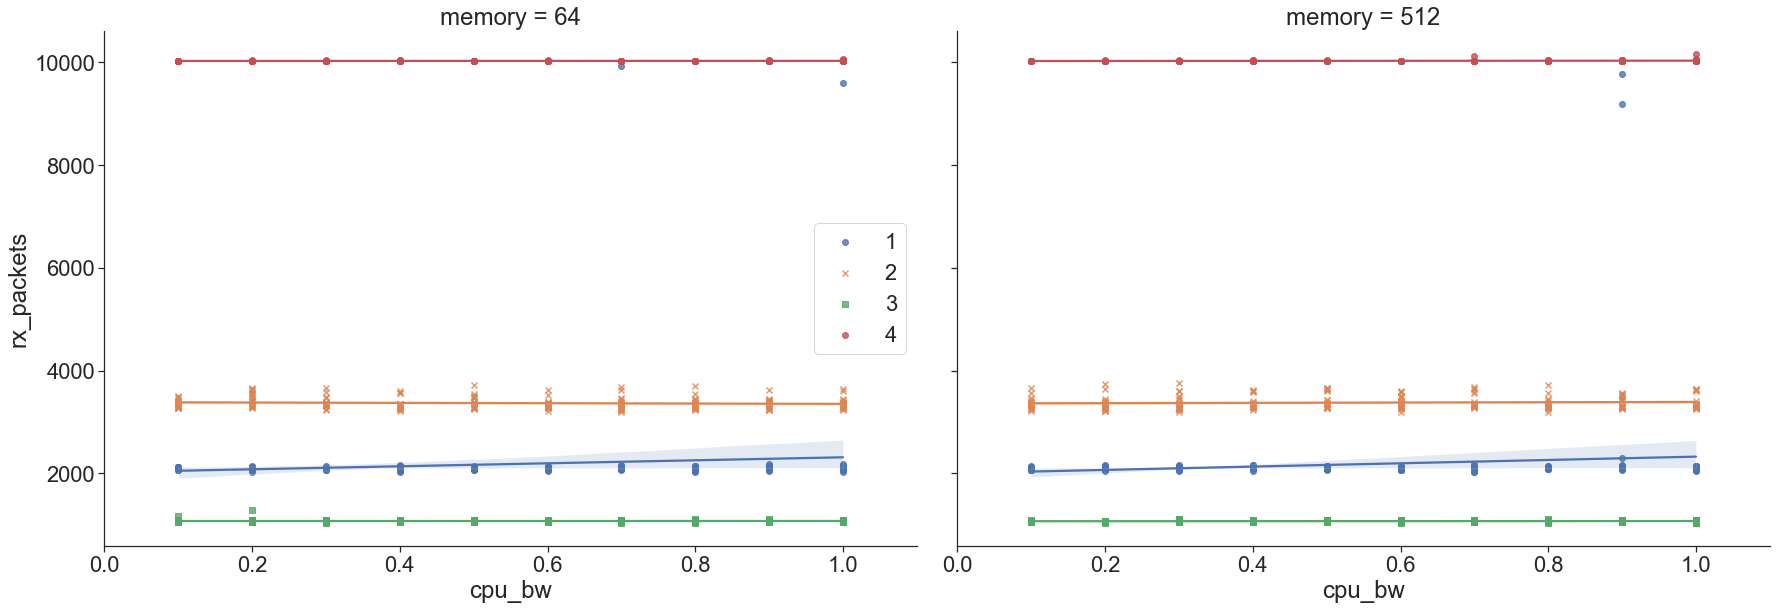

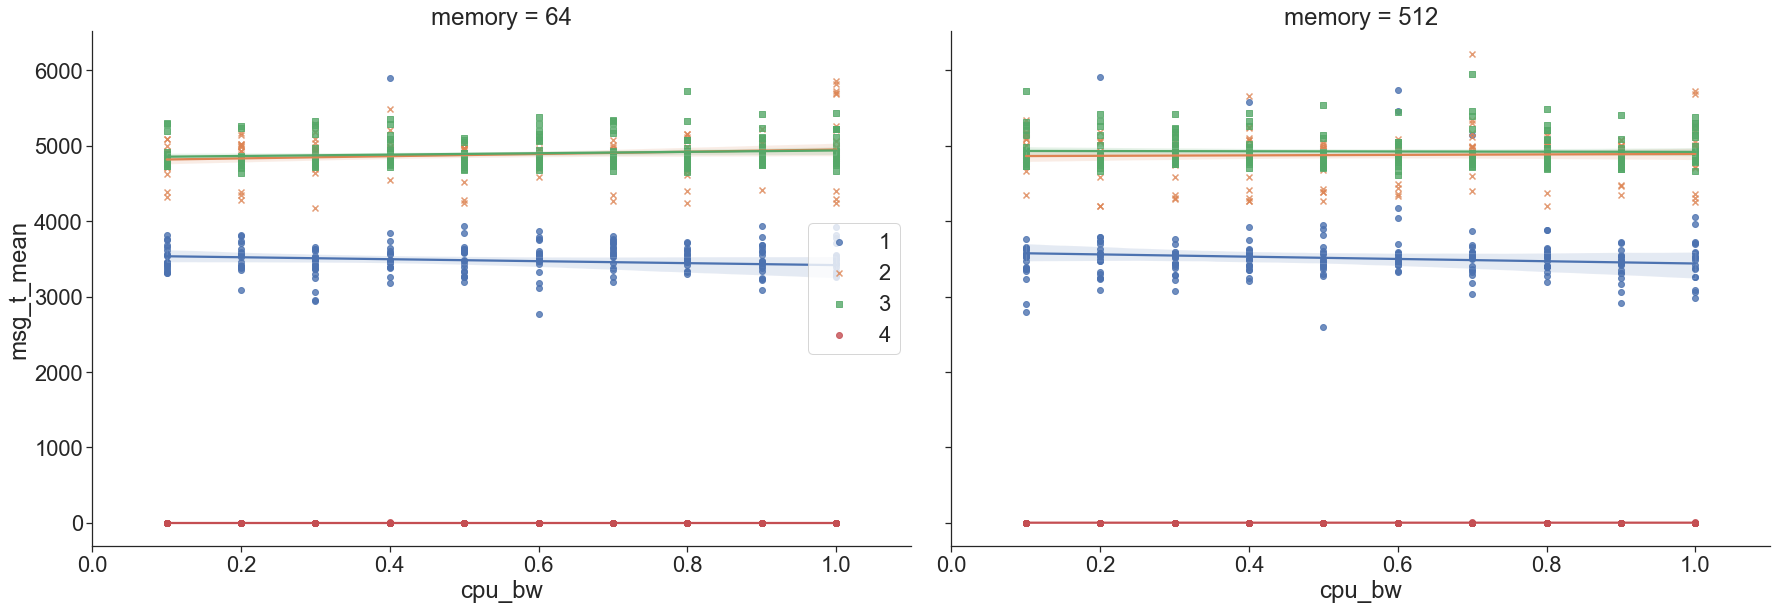

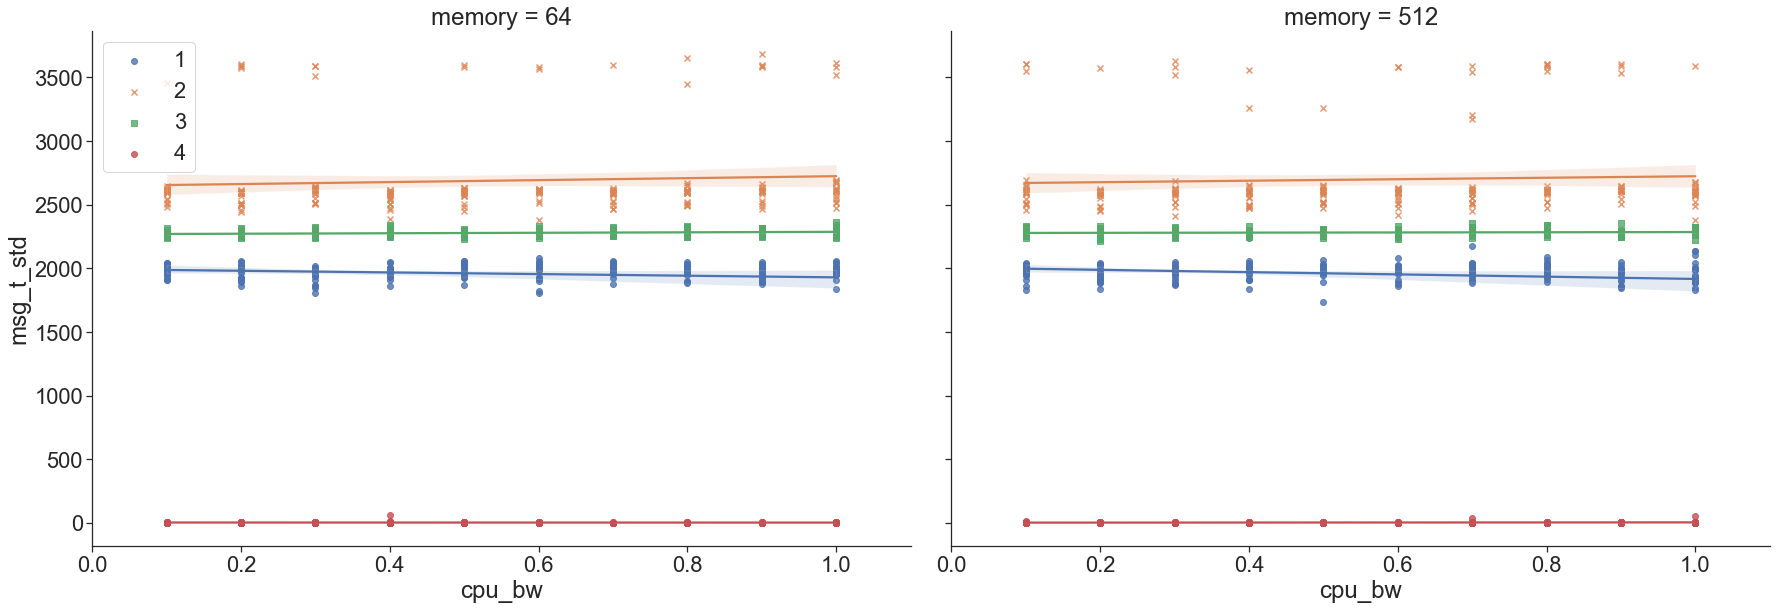

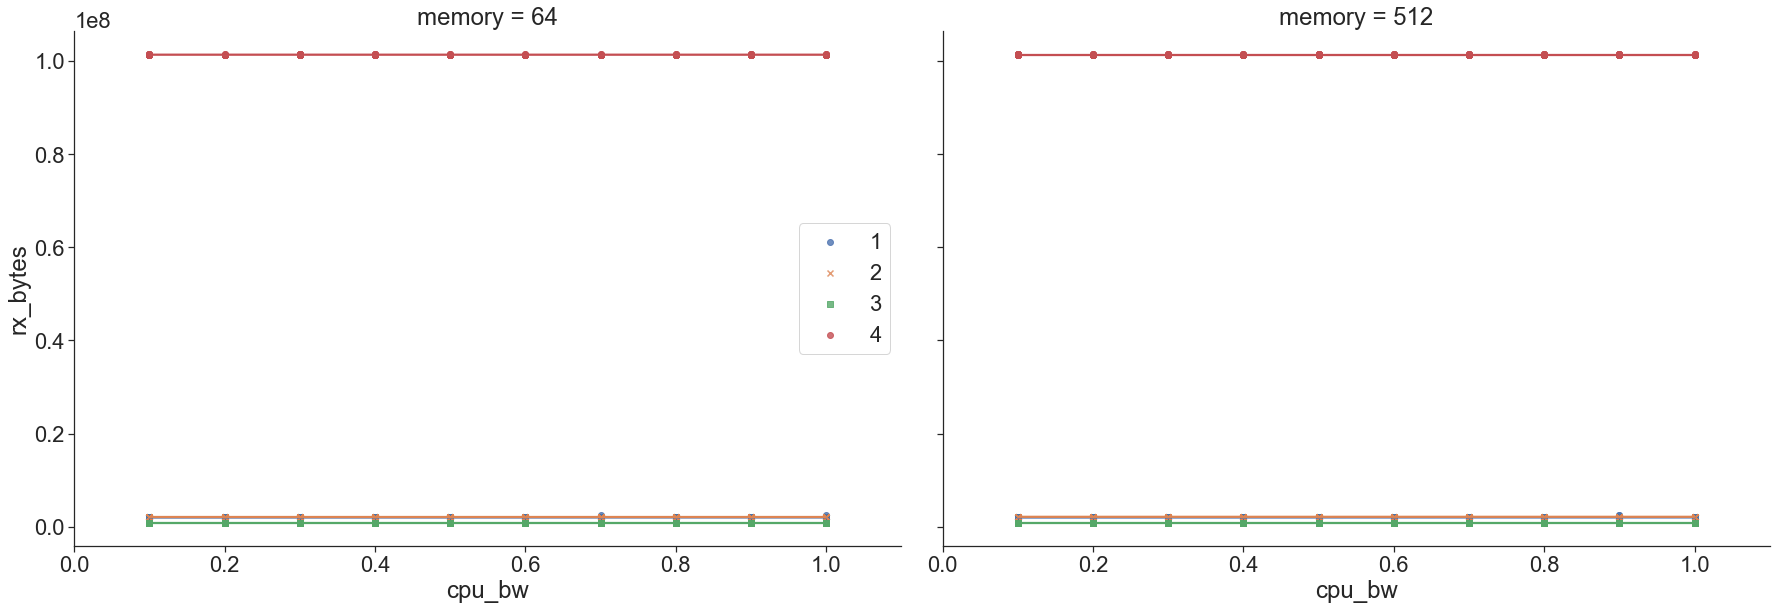

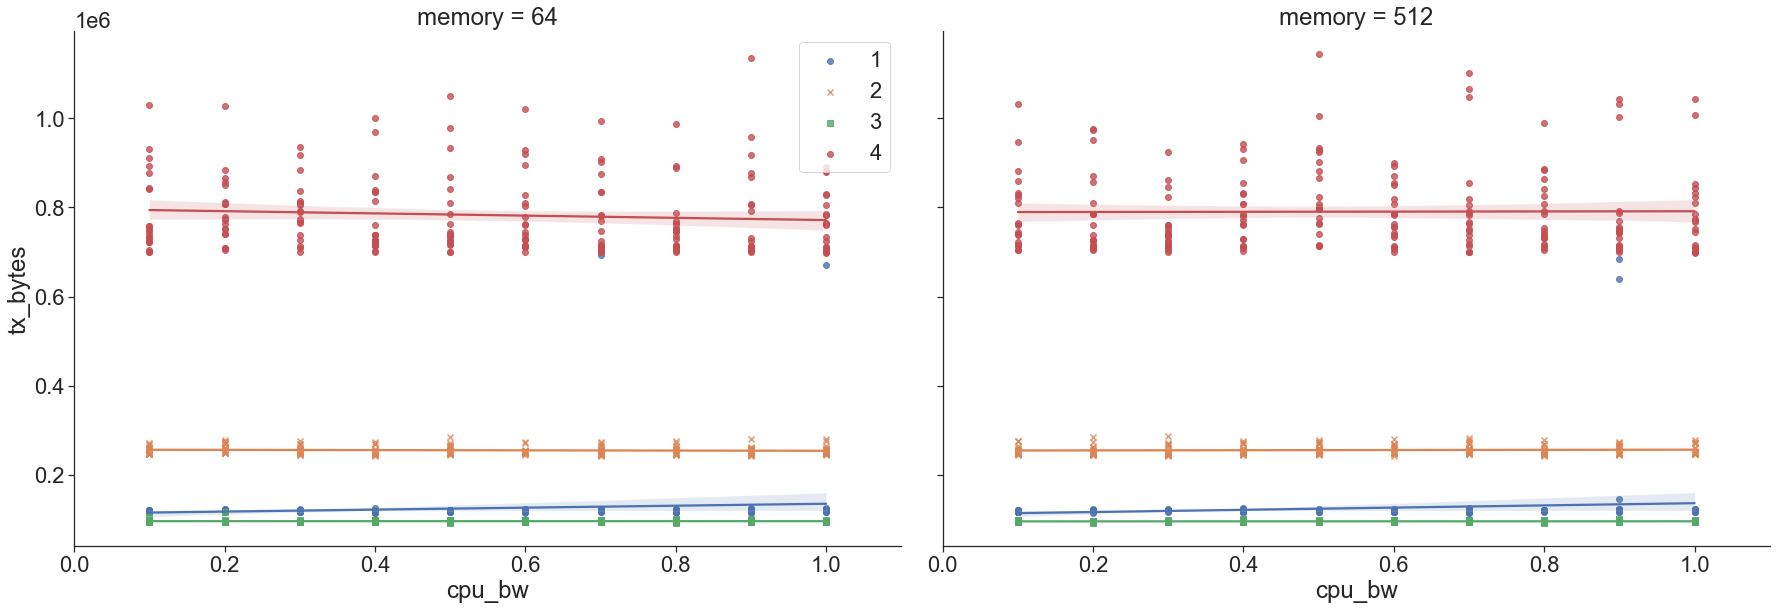

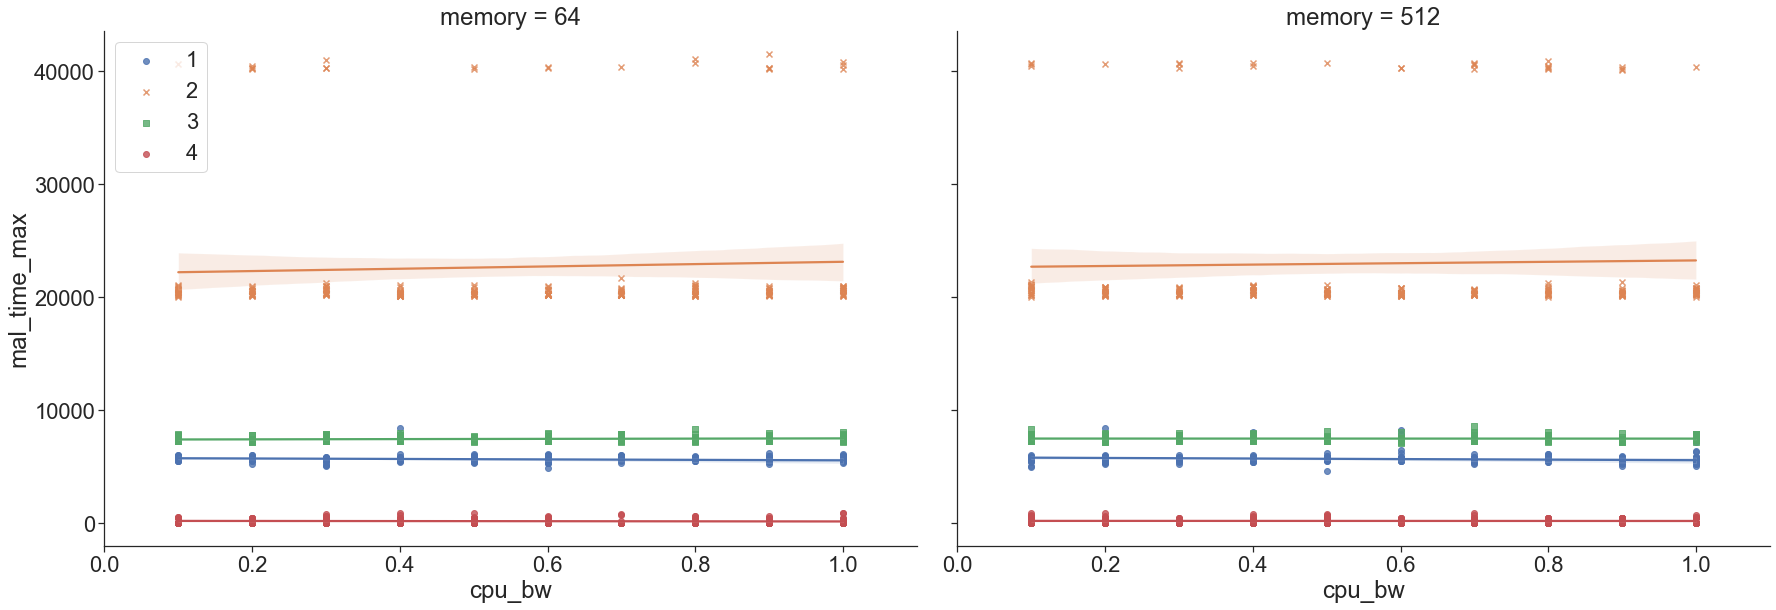

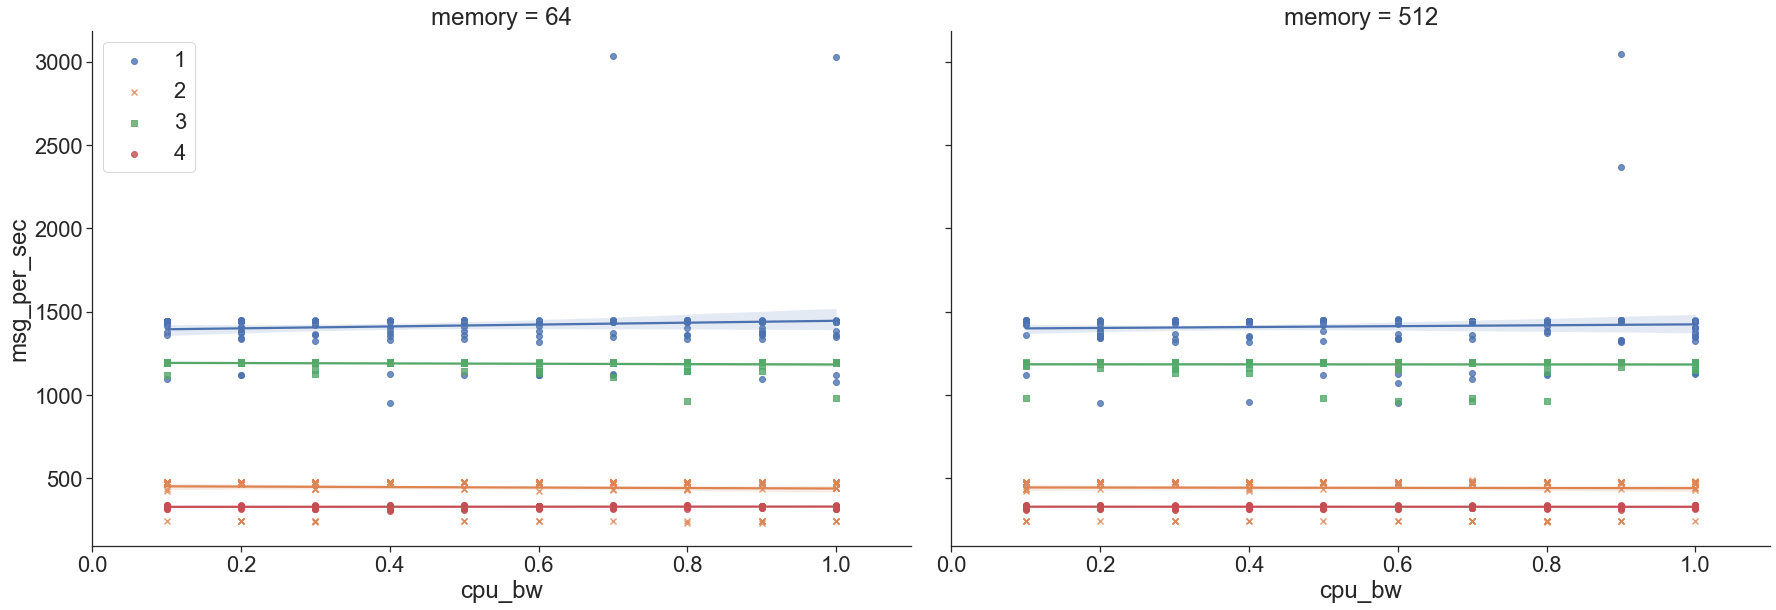

In [229]:
dffM = dfm.copy()
plt.figure(figsize=(16,7))
sns.set(font_scale=2, style="ticks")

for i, m in enumerate(["rx_packets", "msg_t_mean", "msg_t_std", "rx_bytes", "tx_bytes", "mal_time_max", "msg_per_sec"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="req_type", col="memory", data=dffM, height=3*3, aspect=1.4, markers=["o","x","s","o"], legend_out=False, order=1)
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    g.set(xlim=(0.0, 1.1))

<Figure size 1152x504 with 0 Axes>

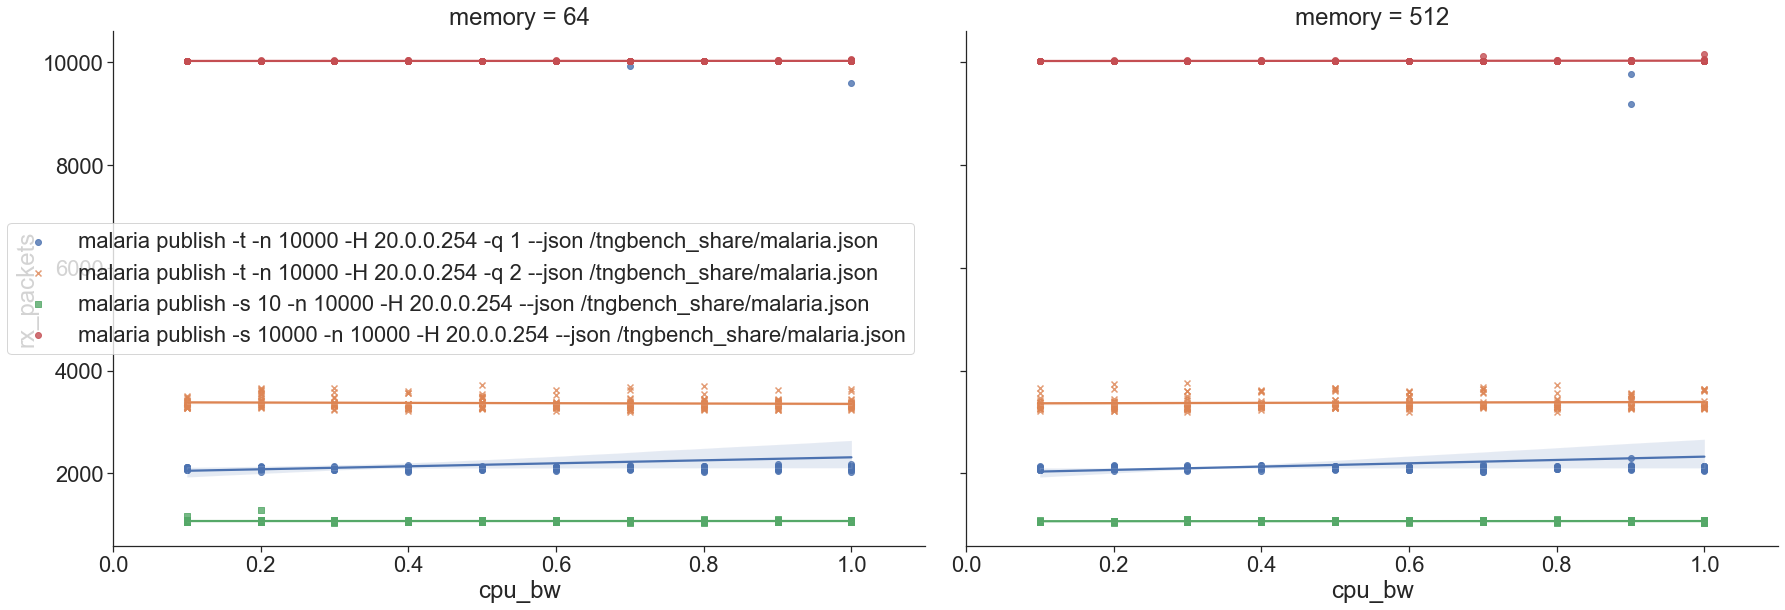

In [262]:
dffM = dfm.copy()
plt.figure(figsize=(16,7))
sns.set(font_scale=2, style="ticks")
   
g = sns.lmplot(x="cpu_bw", y="rx_packets", hue="req_type", col="memory", data=dffM, height=3*3, aspect=1.4, markers=["o","x","s","o"], legend_out=False, order=1)
g.fig.subplots_adjust(wspace=.05)
g.axes.flat[0].get_legend().set_title("")
g.set(xlim=(0.0, 1.1))

<Figure size 1152x504 with 0 Axes>

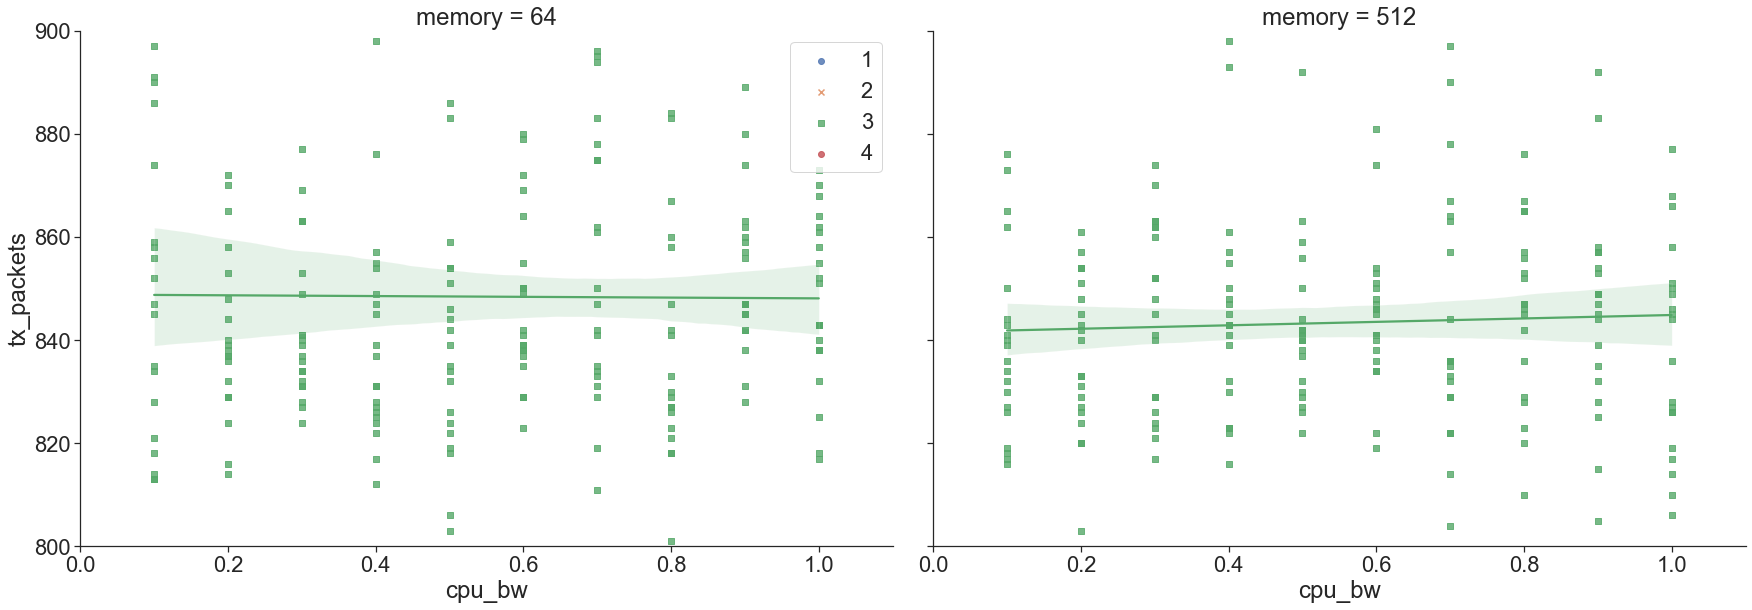

In [258]:

from cmath import log


dffM = dfm.copy()
plt.figure(figsize=(16,7))
sns.set(font_scale=2, style="ticks")

   
g = sns.lmplot(x="cpu_bw", y="if_in_tx_packets", hue="req_type", col="memory", data=dffM, height=3*3, aspect=1.4, markers=["o","x","s","o"], legend_out=False, order=1)
g.fig.subplots_adjust(wspace=.05)

g.set_ylabels("tx_packets")
g.axes.flat[0].get_legend().set_title("")
g.set(xlim=(0.0, 1.1))
g.set(ylim=(800, 900))

<Figure size 1152x504 with 0 Axes>

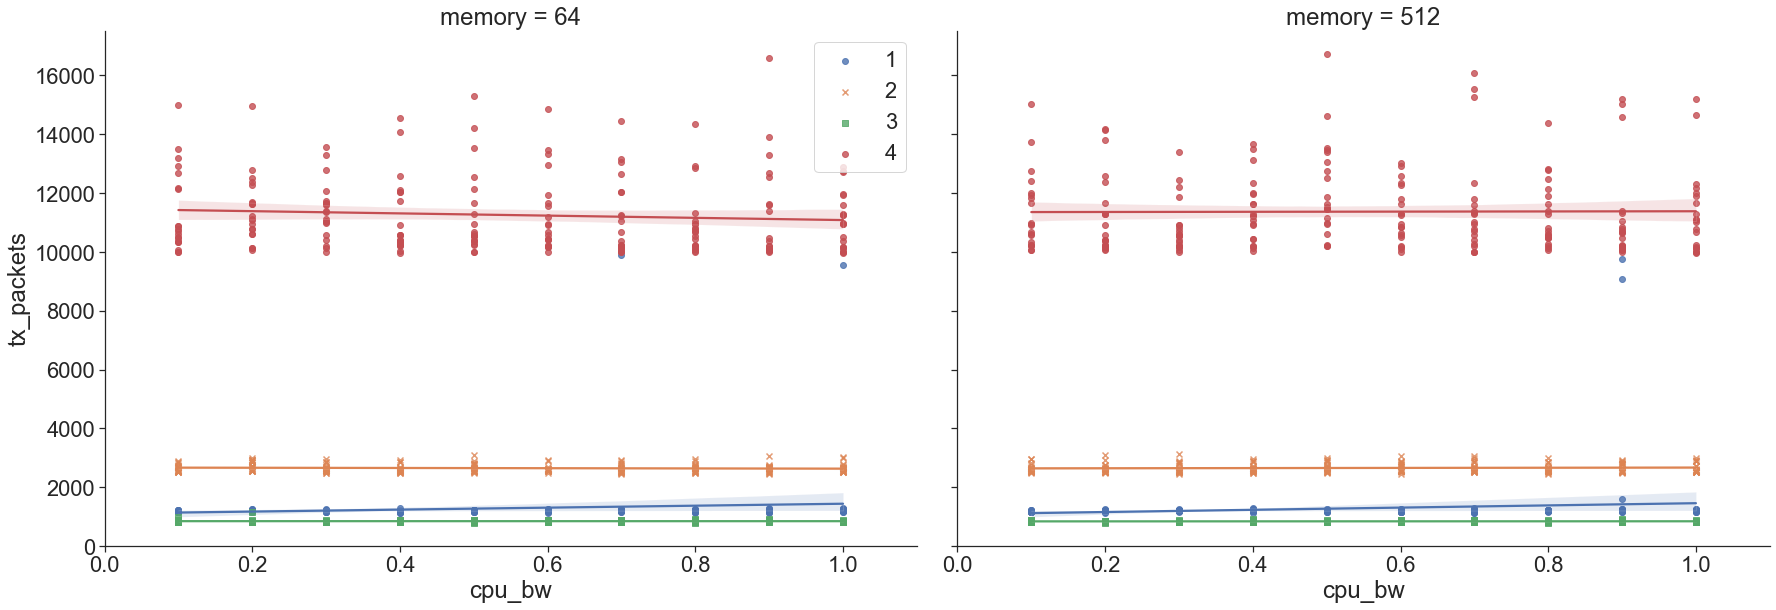

In [260]:
dffM = dfm.copy()
plt.figure(figsize=(16,7))
sns.set(font_scale=2, style="ticks")

   
g = sns.lmplot(x="cpu_bw", y="if_in_tx_packets", hue="req_type", col="memory", data=dffM, height=3*3, aspect=1.4, markers=["o","x","s","o"], legend_out=False, order=1)
g.fig.subplots_adjust(wspace=.05)

g.set_ylabels("tx_packets")
g.axes.flat[0].get_legend().set_title("")
g.set(xlim=(0.0, 1.1))
#g.set(ylim=(500, 10000))

<Figure size 1152x504 with 0 Axes>

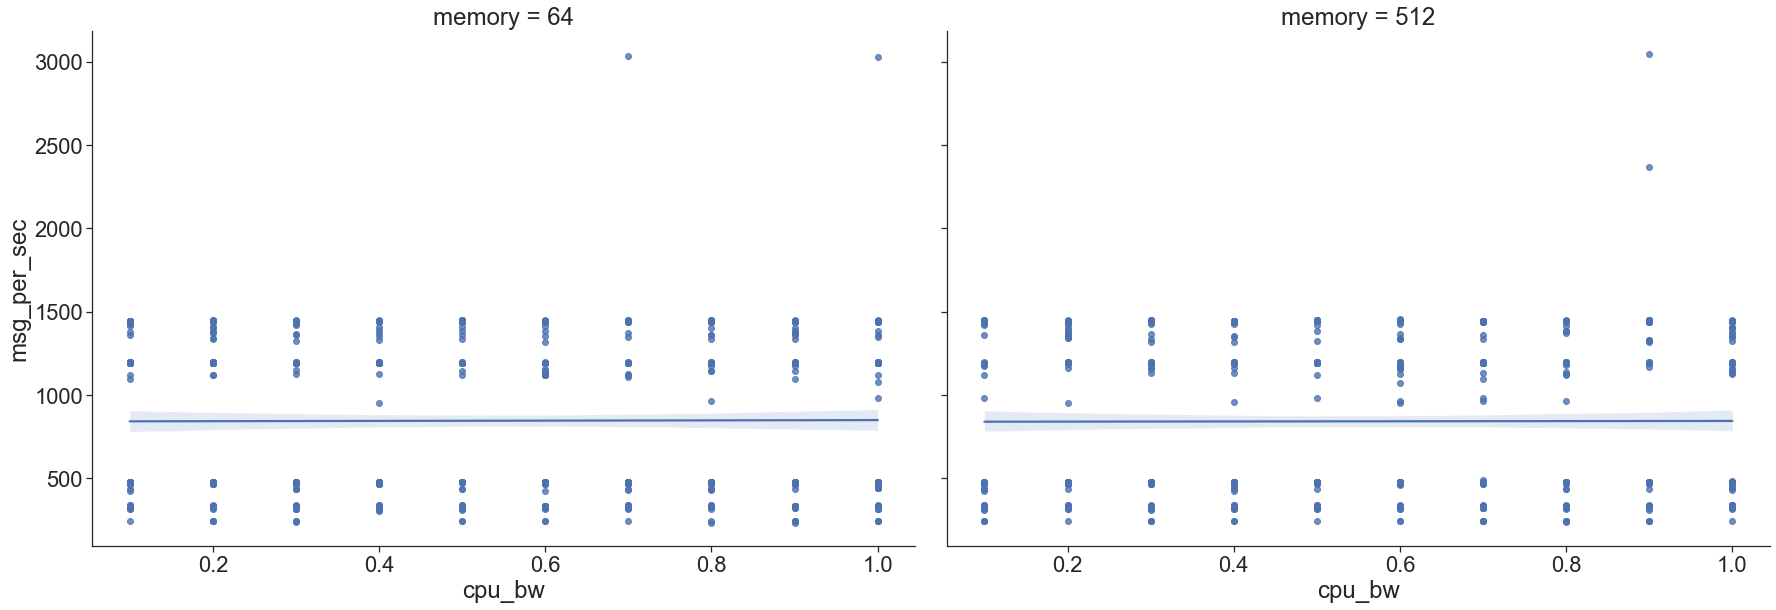

In [205]:
plt.figure(figsize=(16,7))
sns.set(font_scale=2, style="ticks")

sns.lmplot(x="cpu_bw", y="msg_per_sec", col="memory", data=dffM, height=3*3, aspect=1.4, legend_out=False, order=1)

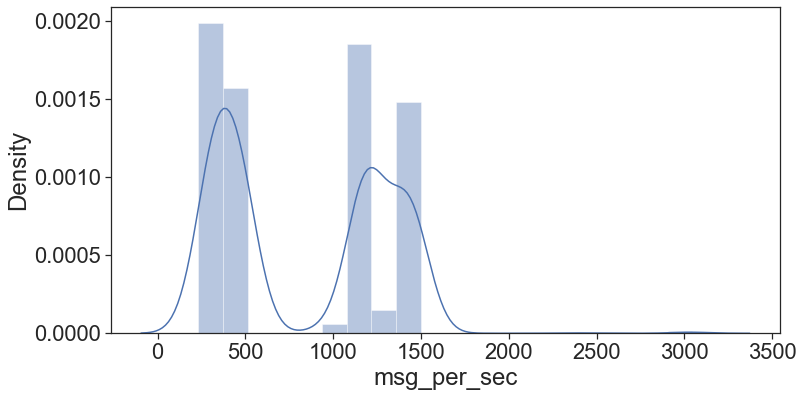

In [206]:

plt.figure(figsize=(12,6))
sns.distplot(dffM["msg_per_sec"],hist=True)  #hist = true mi consente id avere un istogramma in sottofondo 
#plt.xticks(np.linspace(0,1,10)) per avere piu dettagli 
plt.show()


[Text(0, 0.5, 'msg_per_sec')]

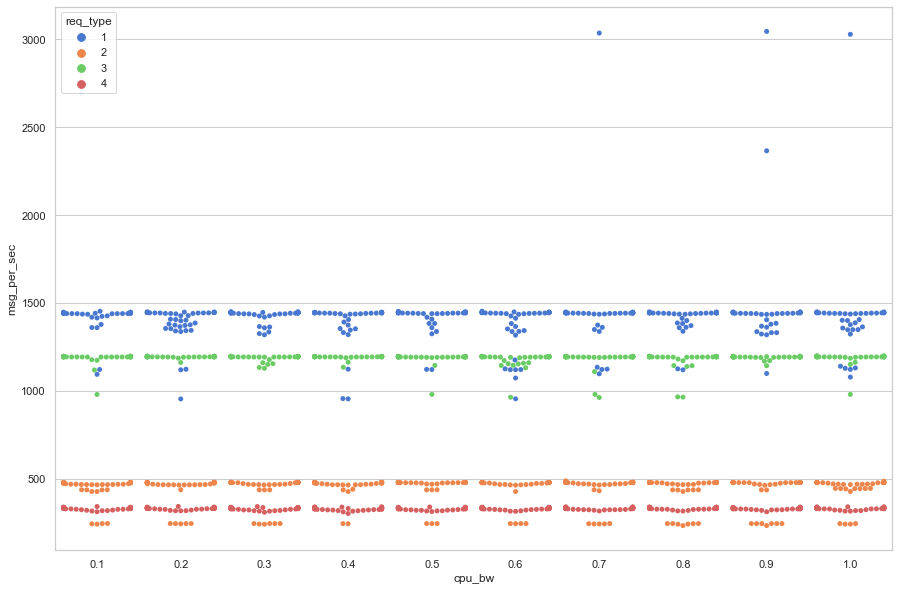

In [207]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=dffM, x="cpu_bw", y="msg_per_sec", hue="req_type")
ax.set(ylabel="msg_per_sec")

<Figure size 1152x504 with 0 Axes>

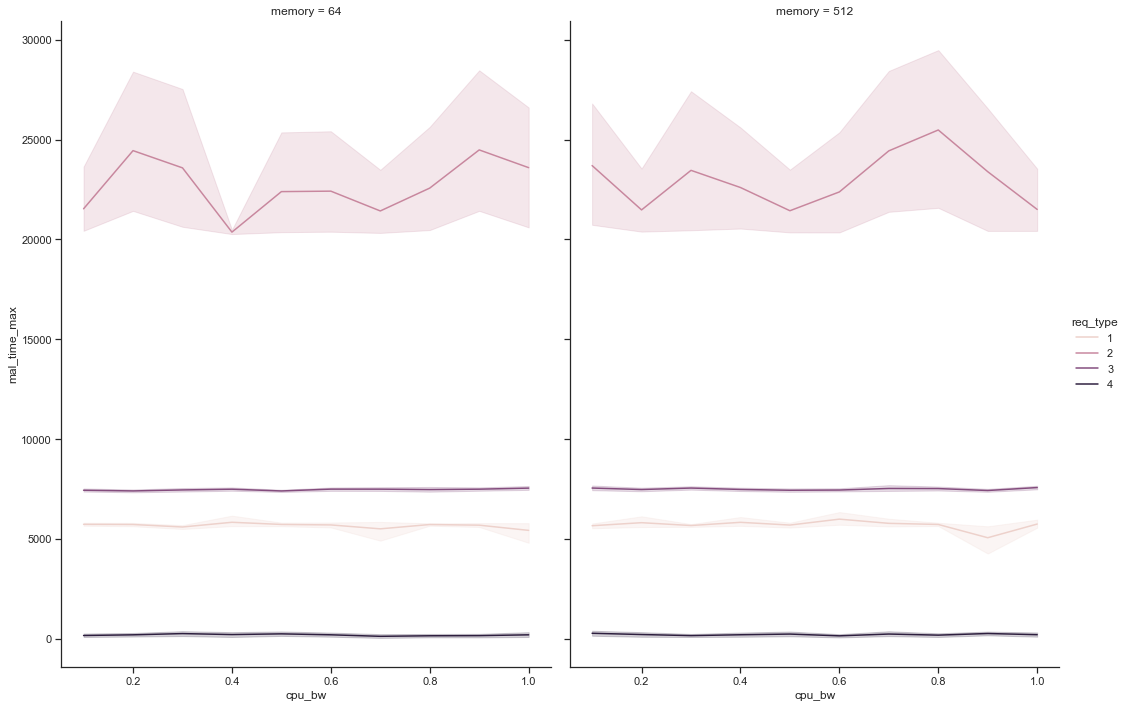

In [226]:

#sns.set_theme(style="ticks")
# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")
plt.figure(figsize=(16,7))

# Plot the lines on two facets
sns.relplot(
    data=dffM,
    x="cpu_bw", y="mal_time_max",
    hue="req_type", col="memory",
    kind="line", size_order=["T1", "T2"],
    height=10, aspect=.75, facet_kws=dict(sharex=False),
)